In [6]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '-1'
# Import

# import os
from os import listdir, path
import random
import numpy as np
import pandas as pd

# matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# keras
import tensorflow as tf
import keras
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.utils import plot_model

In [6]:
# Link to Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Load best model for Source Light classification
# The best model is FromScratchSGD_SL_Bs16_Ep15_Dr0.7_ConvD16_Lr0.003 
modelName = 'FromScratchSGD_SL_Bs16_Ep15_Dr0.7_ConvD16_Lr0.003' 

# model_path = '/content/drive/My Drive/Deep Learning Project - Image Classification/Models/' + modelName + '.h5'
model_path = './Models/'+ modelName + '.h5'

model = load_model(model_path)

Folder Plots already exists


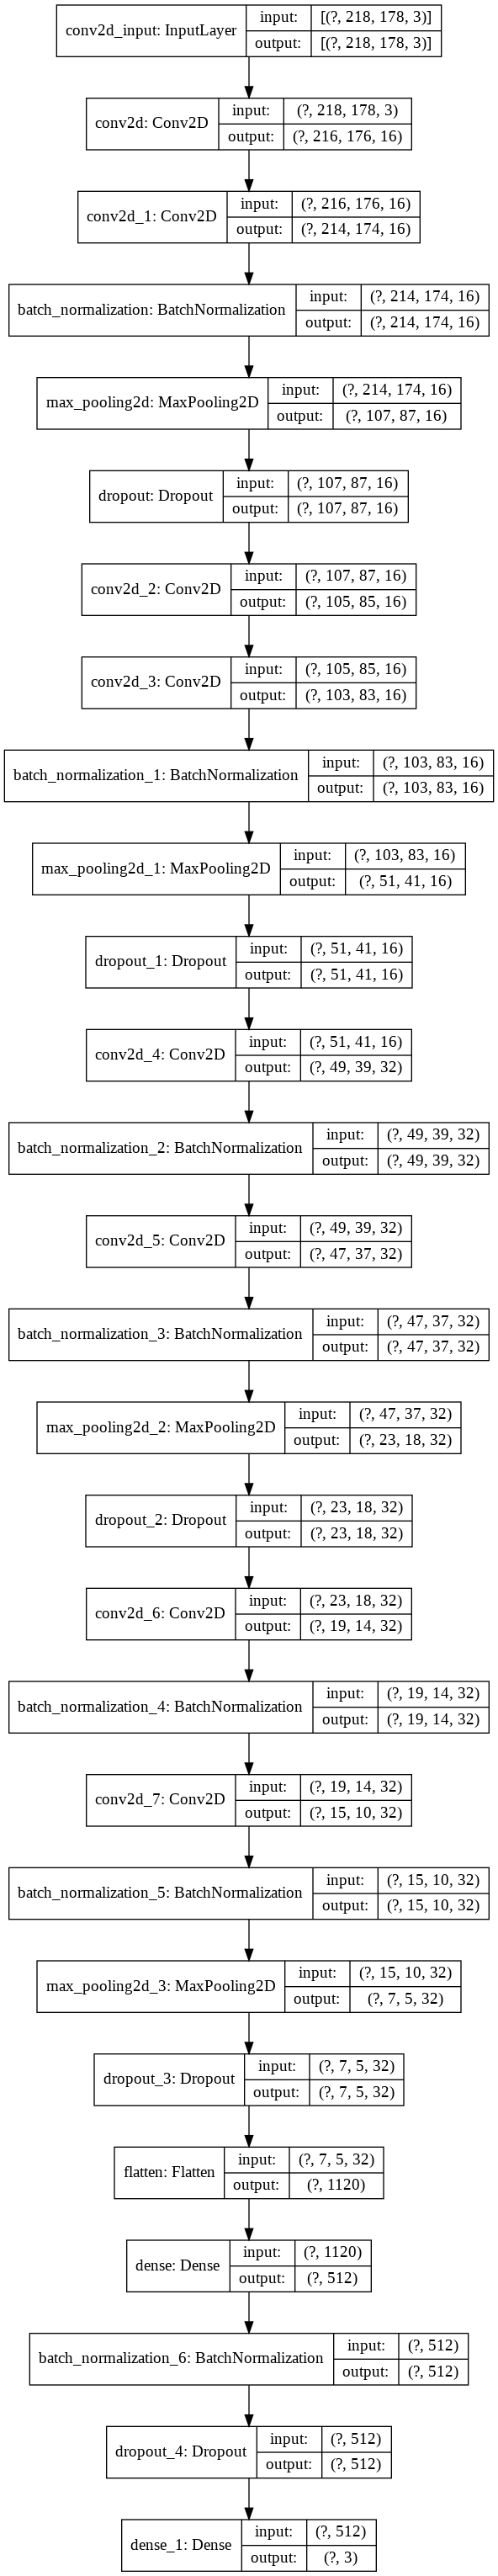

In [11]:
# Plot model tree
# tree_path = './ModelTrees/'
tree_path = '/content/drive/My Drive/Deep Learning Project - Image Classification/ModelTrees' 

if os.path.exists(tree_path) == False:
    os.makedirs(tree_path)
else: 
    print('Folder Plots already exists')
plot_model(model, to_file=f"{tree_path}/{modelName}.png", show_layer_names=True, show_shapes=True)

In [8]:
# Load image

# samples_dir = '/content/drive/My Drive/Deep Learning Project - Image Classification/img_align_celeba_1000samples'
samples_dir = './img_align_celeba_1000samples'

listOfFiles = [os.path.join(samples_dir,file) for file in os.listdir(samples_dir)  if os.path.isfile(os.path.join(samples_dir, file))]
print(len(listOfFiles))
random.shuffle(listOfFiles)

1000


In [9]:
n_files = 9
imageShape=(218,178)
labels_list = ['center_light', 'left_orient_light', 'right_orient_light']

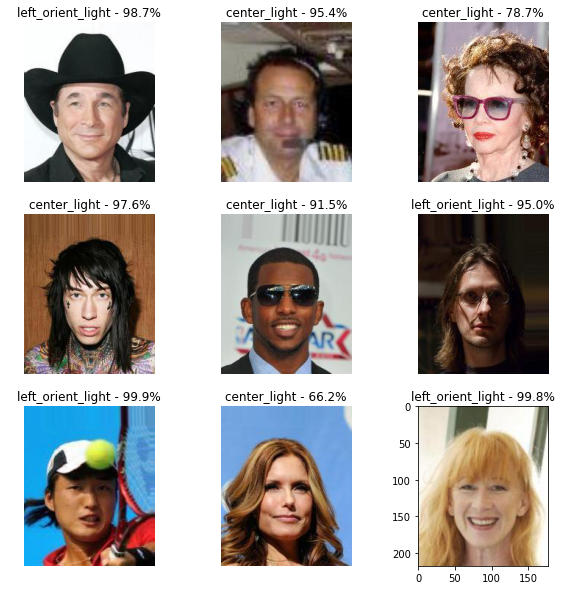

In [21]:
# Output some predictions
# print 9 predictions (sample)

fig, ax = plt.subplots(figsize=(10,10))

# Make predictions
preds = []
labels = []


i = 1
for image in listOfFiles[0:n_files]:
    ax.set_axis_off()
    img = load_img(image, target_size=(218,178))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 218, 178, 3)
    # center pixel data
#   img = img.astype('float32')
    
    pred = model.predict(img)
    idx_label = np.argmax(pred[0])
    pred_label = labels_list[idx_label]
    
    preds.append(pred[0][idx_label])
    labels.append(pred_label)
    
    img = mpimg.imread(image)
    ax = fig.add_subplot(3,3,i)
    ax.imshow(img)      
    ax.set_title('{} - {:03.1f}%'.format(pred_label,pred[0][idx_label]*100))
    
    i += 1

In [ ]:
# Stack together labels and predictions 
pred_to_print = np.vstack((labels, preds)).T
# Save scores in a csv file
pred_to_save = pd.DataFrame(pred_to_print, columns=['labels', 'predictions']).to_csv('predictions_prova.csv', sep=';')

In [11]:
with tf.device("cpu:0"):
# On the WHOLE dataset
    # Create a .csv file with all the images labeled and classified
    samples_dir = './img_align_celeba'
    listOfFiles = [os.path.join(samples_dir,file) for file in os.listdir(samples_dir)  if os.path.isfile(os.path.join(samples_dir, file))]
    print(len(listOfFiles))

    # Make predictions
    preds = []
    labels = []

    # No need of shuffle
    i = 0
    for image in listOfFiles:

        img = load_img(image, target_size=(218, 178))
        # convert to array
        img = img_to_array(img)
        # reshape into a single sample with 3 channels
        img = img.reshape(1, 218, 178, 3)

        pred = model.predict(img)
        idx_label = np.argmax(pred[0])
        pred_label = labels_list[idx_label]

        preds.append(pred[0][idx_label])
        labels.append(pred_label)

        i = i+1
        if i == 100000:
            print('100000')


    # Stack together labels and predictions 
    pred_to_print = np.vstack((labels, preds)).T
    # Save scores in a csv file
    pred_to_save = pd.DataFrame(pred_to_print, columns=['labels', 'predictions']).to_csv('predictionsfull_light.csv', sep=';')

202599
100000
